In [16]:
#Import Python Libraries
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib as mpl
import seaborn as sns
from IPython.display import display, HTML

df_train=pd.read_csv('train.csv')

In [17]:
df_test = pd.read_csv('test.csv')

In [18]:
#Checking the difference in training and testing datasets
diff_train_test = set(df_train.columns) - set(df_test.columns)
diff_train_test

{'Survived'}

In [19]:
#Checking the column names
df_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [20]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [23]:
#Removing unwanted columns
df_train = df_train.drop("PassengerId", 1);

In [24]:
df_train = df_train.drop('Name', 1);
df_train = df_train.drop('Ticket', 1);
df_train = df_train.drop('Embarked', 1);

In [25]:
df_train.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Cabin'], dtype='object')

In [26]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
Cabin       204 non-null object
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [29]:
df_train["Survived"] = df_train["Survived"].astype('category');

In [32]:
df_train["Pclass"] = df_train["Pclass"].astype('category');

In [34]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
Survived    891 non-null category
Pclass      891 non-null category
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
Cabin       204 non-null object
dtypes: category(2), float64(2), int64(2), object(2)
memory usage: 43.8+ KB


In [31]:
display(HTML(df_train.head(10).to_html()))

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin
0,0,3,male,22.0,1,0,7.2500,NaN
1,1,1,female,38.0,1,0,71.2833,C85
2,1,3,female,26.0,0,0,7.9250,NaN
3,1,1,female,35.0,1,0,53.1000,C123
4,0,3,male,35.0,0,0,8.0500,NaN
5,0,3,male,NaN,0,0,8.4583,NaN
6,0,1,male,54.0,0,0,51.8625,E46
7,0,3,male,2.0,3,1,21.0750,NaN
8,1,3,female,27.0,0,2,11.1333,NaN
9,1,2,female,14.0,1,0,30.0708,NaN


# Handling missing data

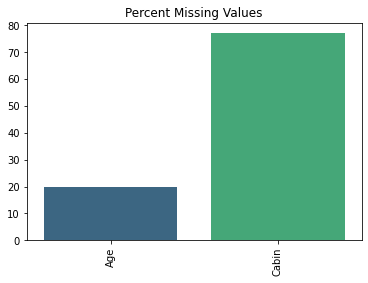

In [35]:
import seaborn as sb
percent = ((df_train.isnull().sum()/df_train.isnull().count()) * 100).sort_values(ascending=True)
percent = percent[percent>0]

plt.xticks(rotation=90); plt.title('Percent Missing Values')
sb.barplot(x=percent.index, y=percent, palette="viridis")

In [36]:
#Since missing values in cabin is almost 80%, hence we will drop this column too

In [37]:
df_train = df_train.drop('Cabin', 1)

In [38]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
Survived    891 non-null category
Pclass      891 non-null category
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
dtypes: category(2), float64(2), int64(2), object(1)
memory usage: 36.9+ KB


In [39]:
#missing data
total = df_train.isnull().sum().sort_values(ascending=False)
percent = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
Age,177,0.198653
Fare,0,0.000000
Parch,0,0.000000
SibSp,0,0.000000
Sex,0,0.000000
Pclass,0,0.000000
Survived,0,0.000000


In [40]:
#Only age has missing values and since age is a numerical variable, we will fill in these missing values with the mean value
df_train["Age"].fillna(df_train["Age"].mean(), inplace=True)

In [41]:
df_train.isnull().sum().max() #just checking that there's no missing data missing...

0

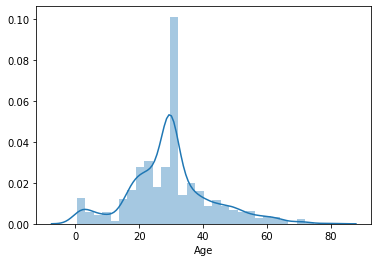

In [44]:
#histogram
sns.distplot(df_train['Age']);

In [45]:
#skewness and kurtosis
print("Skewness: %f" % df_train['Age'].skew())
print("Kurtosis: %f" % df_train['Age'].kurt())

Skewness: 0.434488
Kurtosis: 0.966279


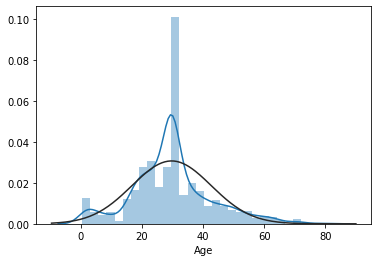

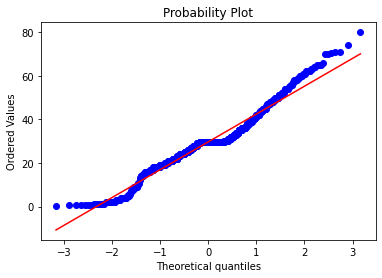

In [50]:
#histogram and normal probability plot
from scipy.stats import norm
from scipy import stats
sns.distplot(df_train['Age'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['Age'], plot=plt)

In [51]:
#create column for new variable (one is enough because it's a binary categorical feature)
#if area>0 it gets 1, for area==0 it gets 0
df_train['TotalAge'] = pd.Series(len(df_train['Age']), index=df_train.index)
df_train['TotalAge'] = 0 
df_train.loc[df_train['TotalAge']>0,'Age'] = 1

In [52]:
#transform data
df_train.loc[df_train['Age']==1,'TotalAge'] = np.log(df_train['TotalAge'])

C:\Users\anjal\Anaconda3\lib\site-packages\pandas\core\series.py:853: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


C:\Users\anjal\Anaconda3\lib\site-packages\seaborn\distributions.py:198: RuntimeWarning: Mean of empty slice.
  line, = ax.plot(a.mean(), 0)
C:\Users\anjal\Anaconda3\lib\site-packages\numpy\core\_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\anjal\Anaconda3\lib\site-packages\numpy\lib\histograms.py:893: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


ValueError: `dataset` input should have multiple elements.

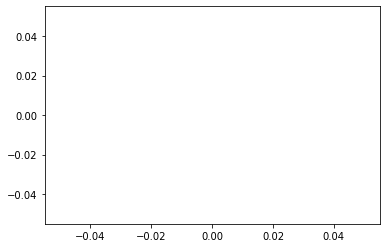

In [53]:
#histogram and normal probability plot
sns.distplot(df_train[df_train['TotalAge']>0]['TotalAge'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train[df_train['TotalAge']>0]['TotalAge'], plot=plt)

In [54]:
pwd

'C:\\Users\\anjal\\Desktop\\Project\\Titanic (Classification)'